<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 33</h1>
</div>

# 1. Binary search trees
# 2. Applications (range searching)
# 3. Rust: `BTreeMap` and `BTreeSet`
# 4. Tries (Prefix Trees)


## Binary search trees

* Organize data into a binary tree
  * Similar to binary heaps

<div align="center">
<img src="sample_tree.png" alt="[sample tree]" width="37%">
</div>

* Invariant at each node:
  * all left descendants${}\le{}$parent
  * parent${}\le{}$all right descendants

<div align="center">
<img src="relationship.png" alt="[sample tree]" width="37%">
</div>

* Compared to binary heaps:
  * different ordering of elements

## Basic operations: find a key $k$

How can we do this?

* Descend recursively from the root until $k$ found or stuck:
  * If $k<{}$value at the current node, go left
  * If $k>{}$value at the current node, go right

<br>
<br>
<div align="center">
    <b>[see examples on the board]</b>
</div>

## Basic operations: insert a key $k$

How can we do this?

* Keep descending from the root until you leave the tree
  * If $k\le{}$value at the current node, go left
  * If $k>{}$value at the current node, go right
* Create a new node containing $k$ there

<br>
<br>
<div align="center">
    <b>[see examples on the board]</b>
</div>

## Basic operations: delete a node

How can we do this?

* More complicated: need to find a replacement
* If the node is a leaf: nothing to do
* If only one child: move the child up
* Otherwise:
  * find the **rightmost** descendant in the **left** subtree
  * it will have at most one child

<br>
<br>
<div align="center">
    <b>[see examples on the board]</b>
</div>

## Cost of these operations?

<div align="center">
    <b>$O($depth of the tree$)$</b>

**Bad news:** the depth can be made proportional to $n$, the number of nodes

**Good news:** smart ways to make the depth $O(\log n)$

## Balanced binary search trees

There are smart ways to rebalance the tree!

* Depth: $O(\log n)$

* Usually additional information has to be kept at each node

* Popular examples:
  * Red–black trees
  * AVL trees
  * BTrees (Used in Rust)
  * ...
  
  Fundamentally they all support rebalancing operations using some form of tree rotation.

## Why use binary search trees?

* Hash maps and hash sets give us $O(1)$ time operations?

### Reason 1: 

* Good worst case behavior: no need for a good hash function

### Reason 2:
* Can answer efficiently questions such as:
  * What is the smallest/greatest element?
  * What is the smallest element greater than $x$?
  * List all elements between $x$ and $y$
  

## Example: find the smallest element greater than $x$

**Question:** How can you list all elements in order in $O(n)$ time?

**Answer:** recursively starting from the root

* visit left subtree
* output current node
* visit right subtree

**Outputting smallest element greater than $x$:**

* Like above, ignoring whole subtrees smaller than $x$
* Will get the first element greater than $x$ in $O(\log n)$ time

For balanced trees: listing $t$ first greater elements takes $O(t + \log n)$ time

## Binary search trees in Rust's standard library?

* Not exactly

* For efficiency reasons, $B$-trees:
  * generalization of binary trees
  * between $B$ and $2B$ keys in a node
  * corresponding number of subtrees

Where can you meet $B$-trees
* Traditionally, very popular in databases
* Interesting that now considered more efficient for in memory operations

## `std::collections::BTreeSet` and `...::BTreeMap`

Sets and maps, respectively

In [2]:
// let's create a set
use std::collections::BTreeSet;
let mut set: BTreeSet<i32> = BTreeSet::new();
set.insert(5);
set.insert(7);
set.insert(11);
set.insert(23);
set.insert(25);

In [3]:
// listing a range
set.range(7..24).for_each(|x| println!("{}", x));

7
11
23


In [4]:
// listing a range: another way of specifying it
use std::ops::Bound::{Included,Excluded};
set.range((Excluded(5),Included(11))).for_each(|x| println!("{}", x));

7
11


# Trie

A very efficient data structure for dictionary search, word suggestions, error corrections etc.

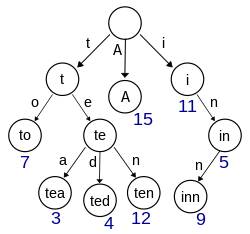

Available in Rust as an external create https://docs.rs/trie-rs/latest/trie_rs/


In [12]:
:dep trie-rs="0.1.1"
fn testme() {
    use std::str;
    use trie_rs::TrieBuilder;
    let mut builder = TrieBuilder::new();  // Inferred `TrieBuilder<u8>` automatically

    builder.push("to");
    builder.push("tea");
    builder.push("ted");
    builder.push("ten");
    builder.push("teapot");
    builder.push("in");
    builder.push("inn");
    let trie = builder.build();
    let results_in_u8s: Vec<Vec<u8>> = trie.predictive_search("te");
    let results_in_str: Vec<&str> = results_in_u8s
        .iter()
        .map(|u8s| str::from_utf8(u8s).unwrap())
        .collect();
    println!("{:?}", results_in_str);
}

testme();


["tea", "teapot", "ted", "ten"]


### Most likely your spellchecker is based on a trie

* If your word is not in the trie do the following:
  * Step 1: Find the largest prefix that is present and find the trie words with that prefix
  * Step 2: Delete the first letter from your word and redo Step 1
  * Step 3: Insert a letter (for all letters) to the beginning of the word and redo Step 1
  * Step 4: Replace the beginning letter with a different one (for all letters) and redo Step 1
  * Step 5: Transpose the first two letters and redo Step 1
  * Step 6: Collect all words from Steps 1-5 sort by frequency of occurrence and present t